Data loaded successfully

Generating SHAP Analysis for LP_92


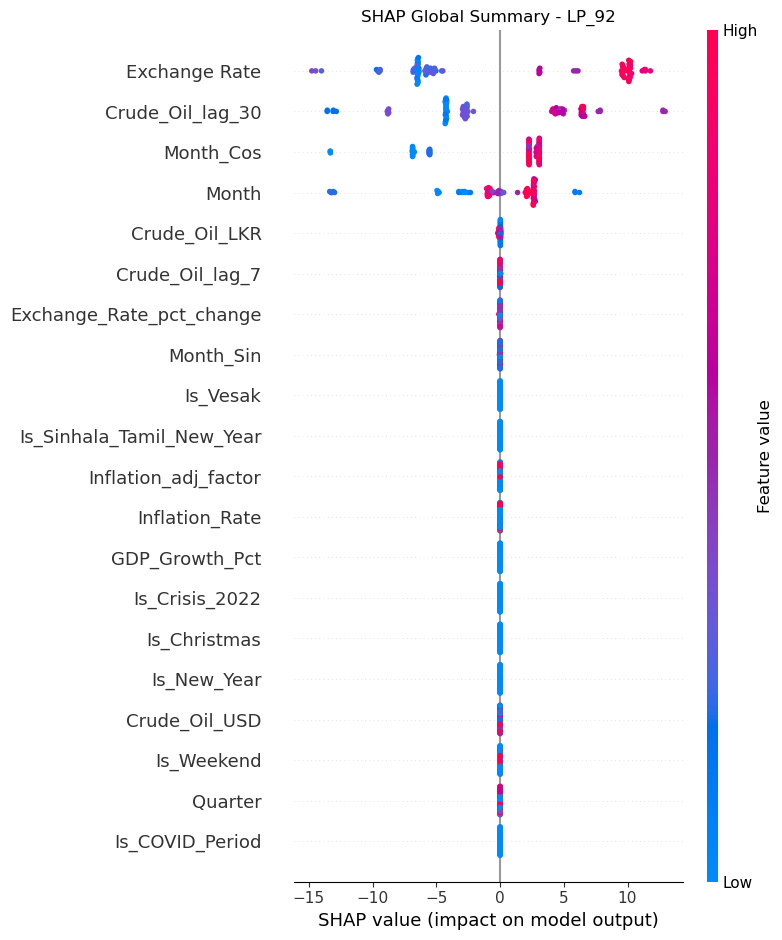

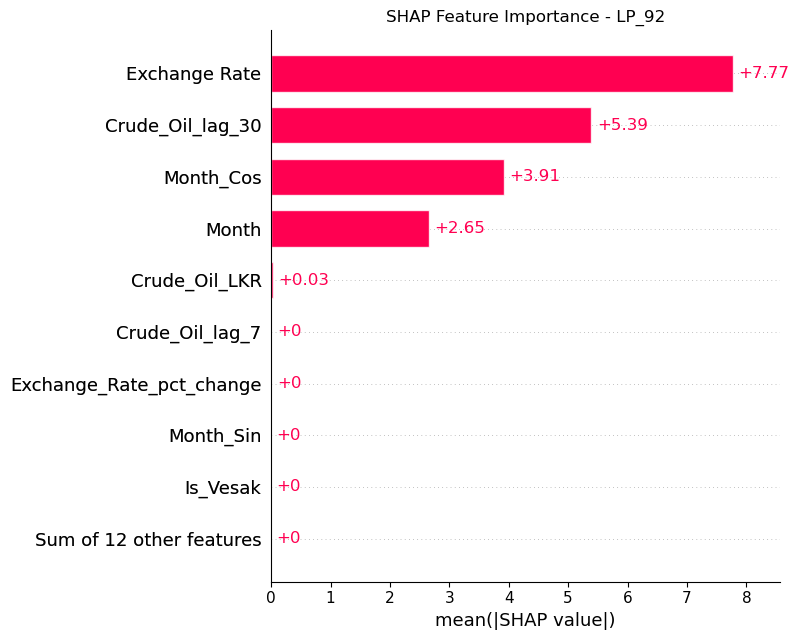

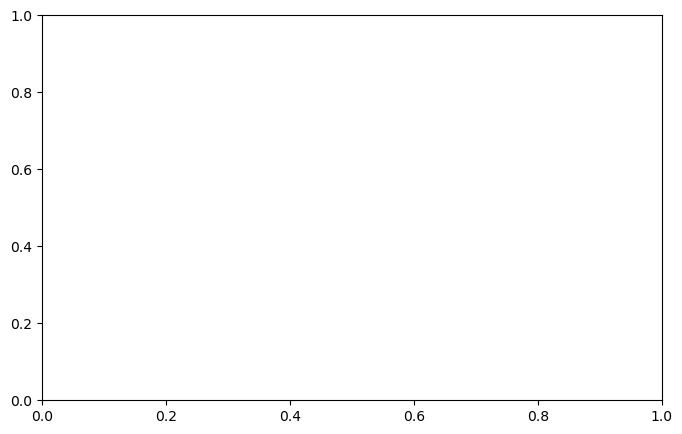

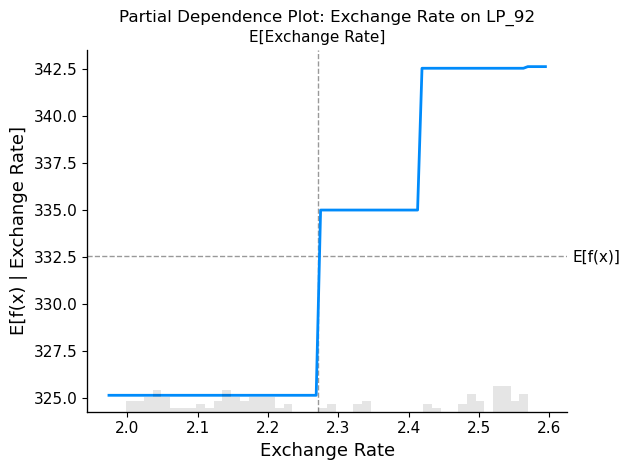


Generating SHAP Analysis for LP_95


PermutationExplainer explainer: 101it [00:12,  1.69it/s]                        


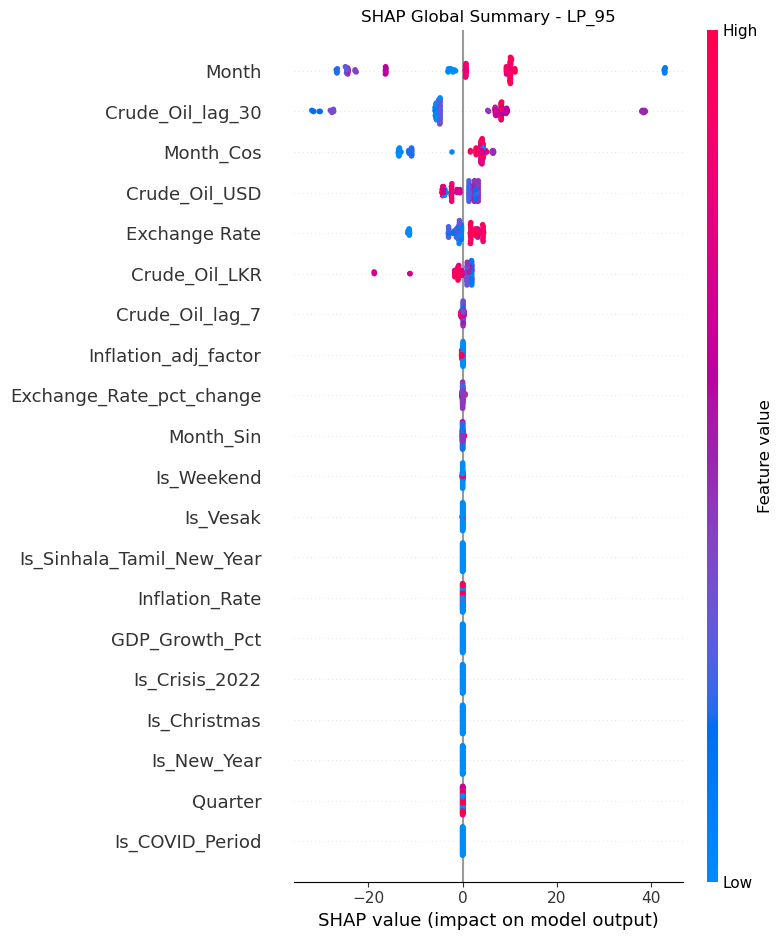

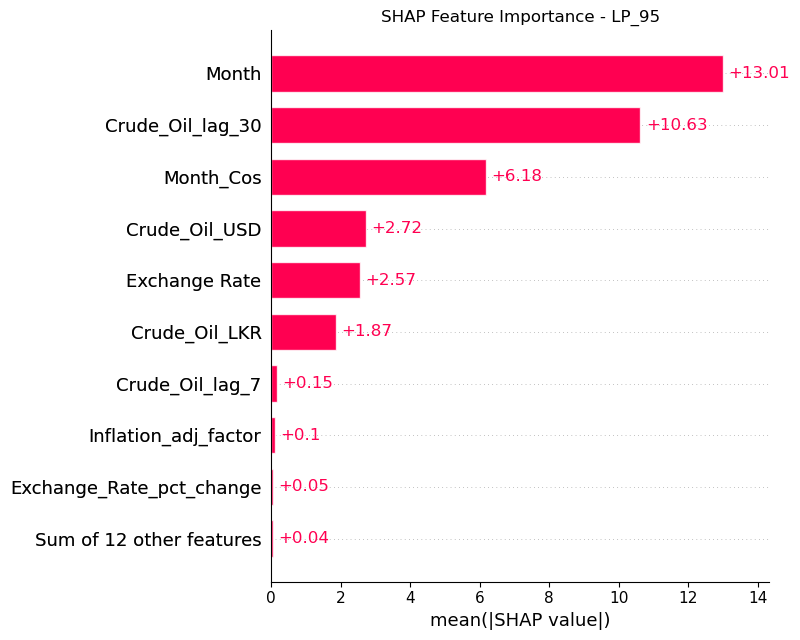

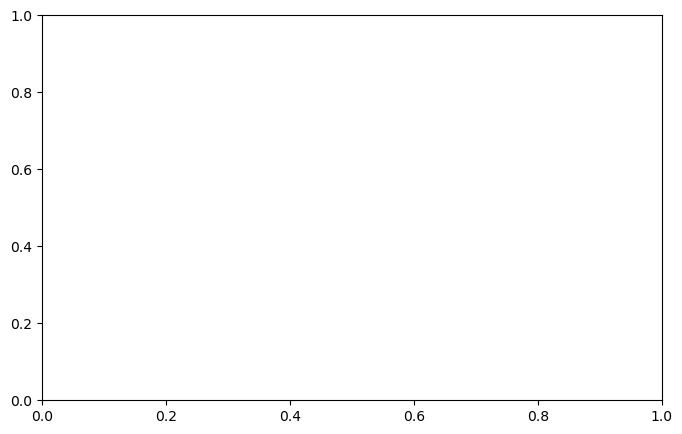

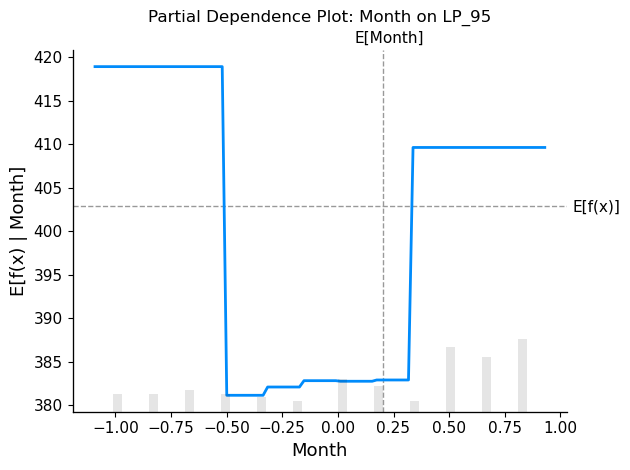


Generating SHAP Analysis for LAD


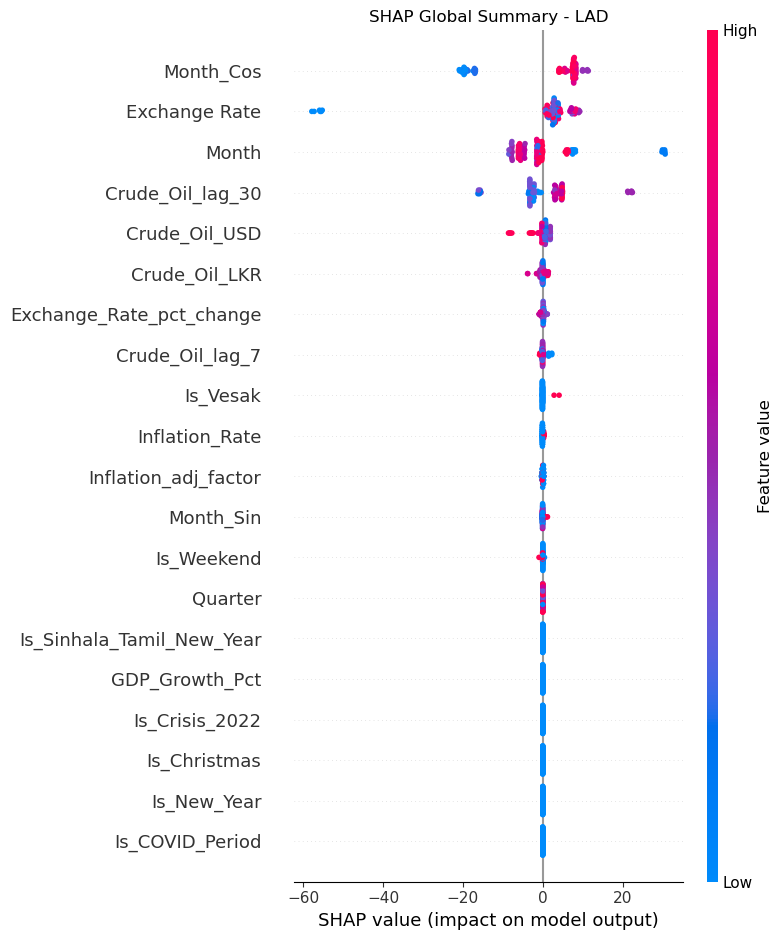

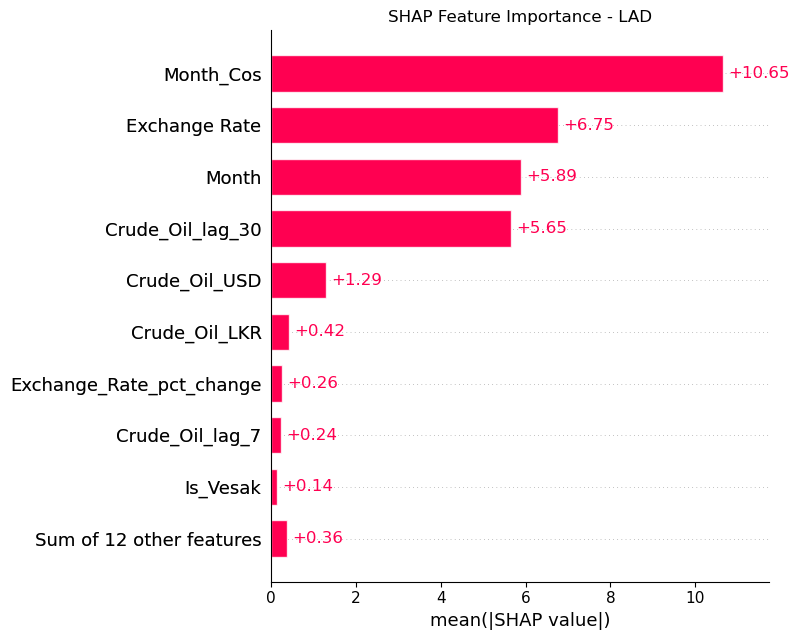

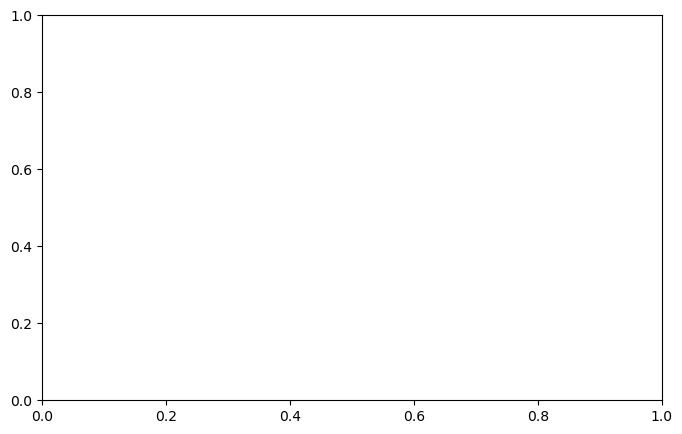

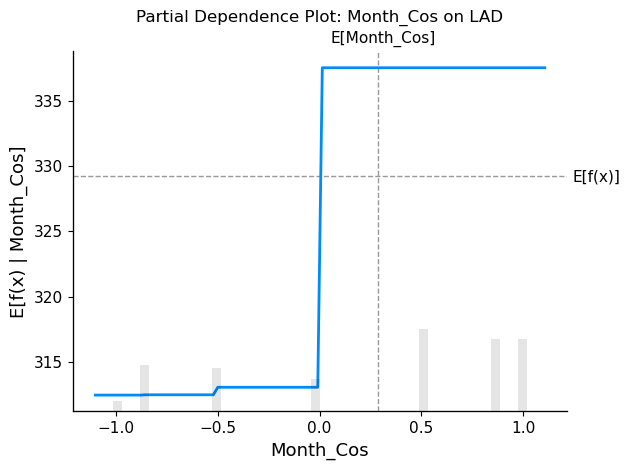


Generating SHAP Analysis for LSD


PermutationExplainer explainer: 101it [00:10,  1.53s/it]                        


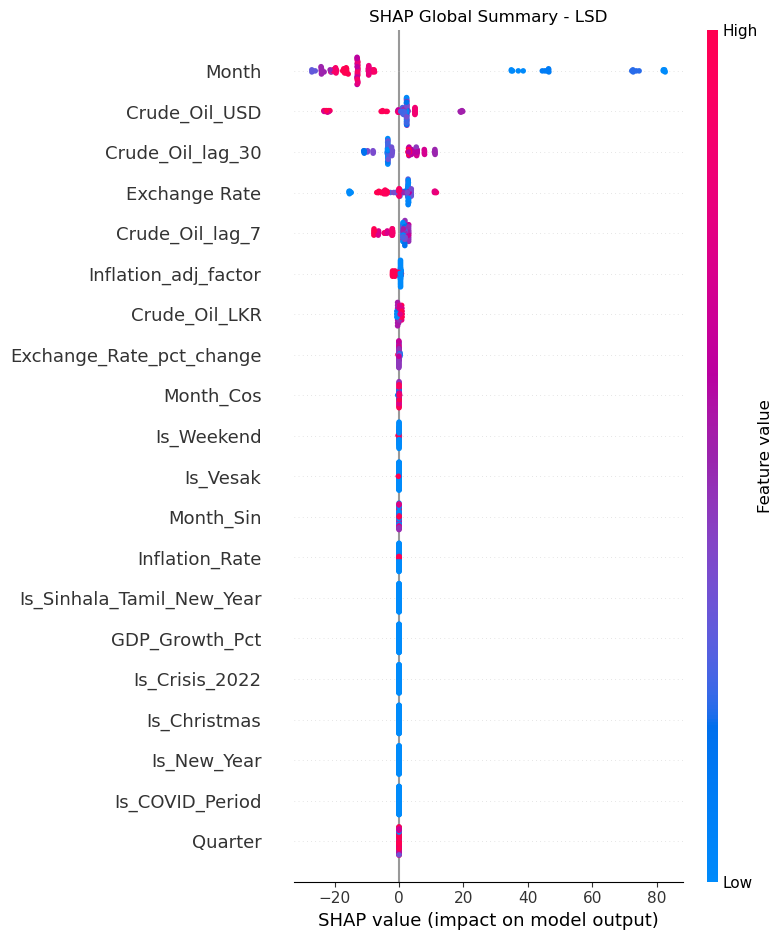

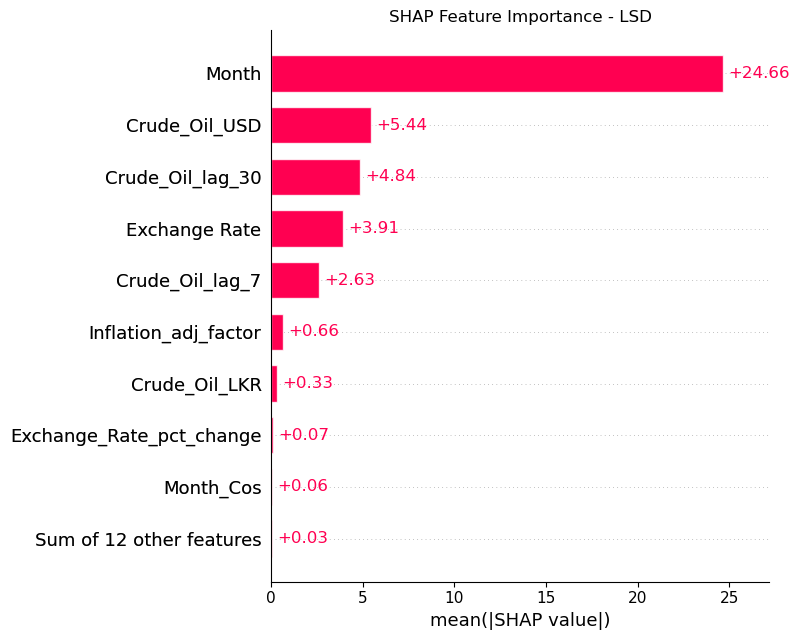

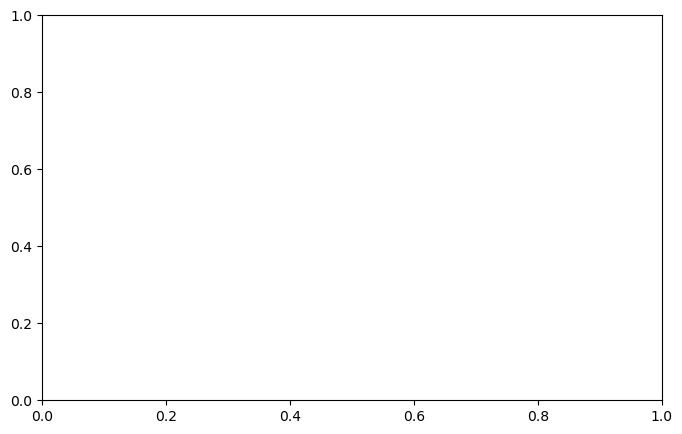

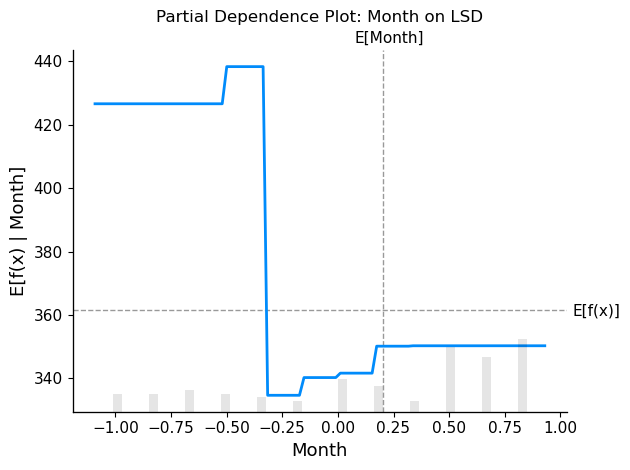


Generating SHAP Analysis for LK


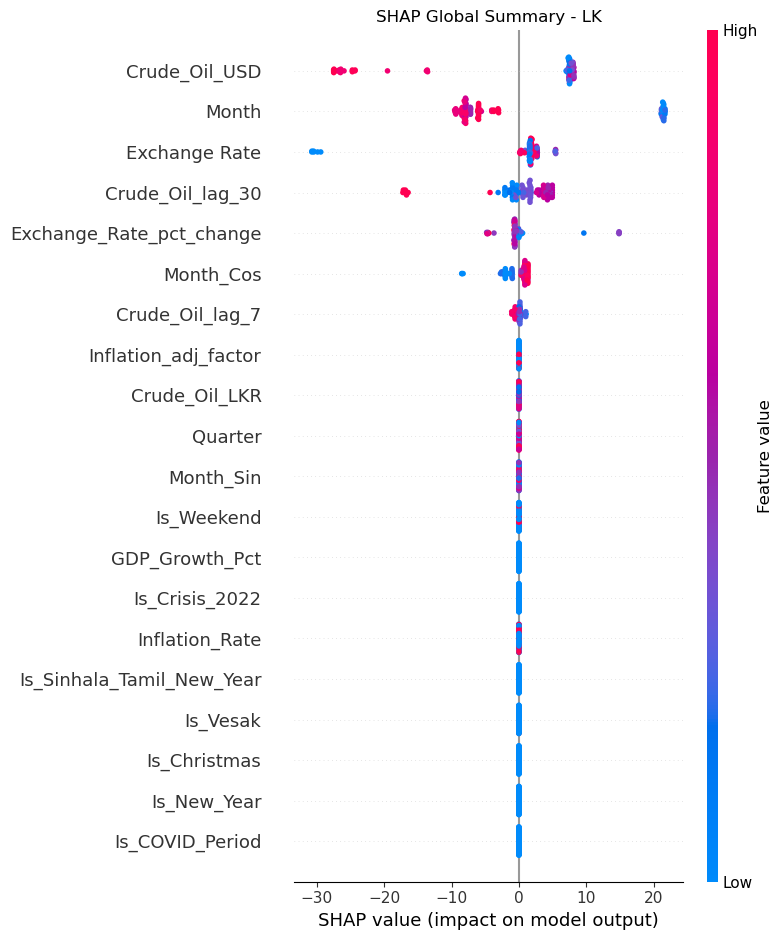

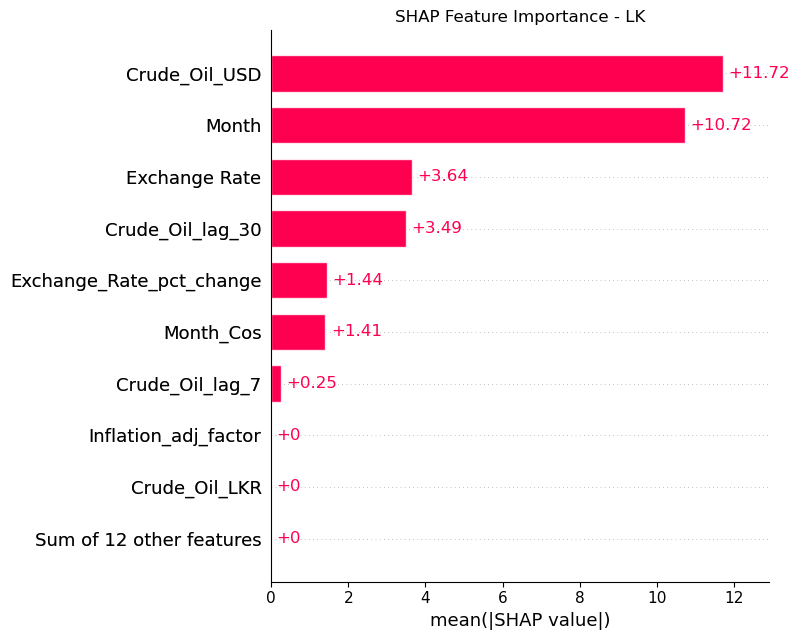

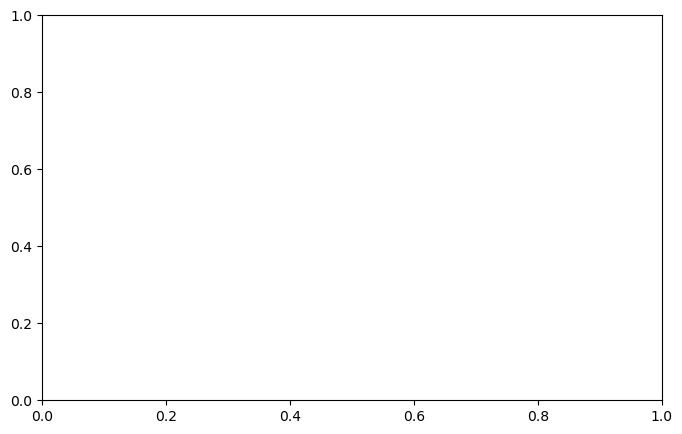

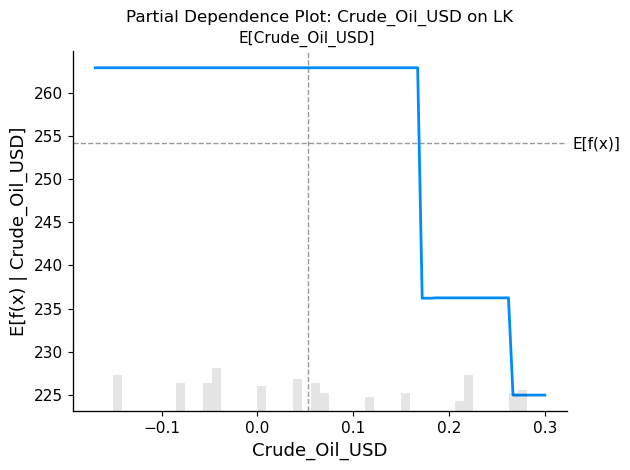


All explainability plots generated and saved to /reports/ folder!


In [1]:
# %% [markdown]
# # Step 4: Model Explainability with SHAP (All Fuels)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import joblib
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data
feature_names = joblib.load('../models/feature_names.pkl')
X_test = pd.read_csv('../feature_engineered_data/X_test.csv')
y_test = pd.read_csv('../feature_engineered_data/y_test.csv')

# Create a sample for faster SHAP processing
X_sample = X_test.sample(n=min(100, len(X_test)), random_state=42)

print("Data loaded successfully")

# %% [markdown]
# ## Generate Explanations for All 5 Fuels
# %%
fuels = ['LP_92', 'LP_95', 'LAD', 'LSD', 'LK']

for fuel in fuels:
    print(f"\n{'='*50}")
    print(f"Generating SHAP Analysis for {fuel}")
    print(f"{'='*50}")
    
    # Load specific model
    try:
        model = joblib.load(f'../models/xgb_{fuel.lower()}_best.pkl')
    except:
        model = joblib.load(f'../models/xgb_{fuel.lower()}.pkl')
        
    # Use model-agnostic explainer to bypass XGBoost 2.x base_score bug
    explainer = shap.Explainer(model.predict, X_sample)
    shap_values = explainer(X_sample)
    
    # 1. SHAP Summary Plot (Beeswarm)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=False)
    plt.title(f'SHAP Global Summary - {fuel}')
    plt.tight_layout()
    plt.savefig(f'../reports/shap_summary_{fuel}.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # 2. SHAP Feature Importance (Bar)
    plt.figure(figsize=(10, 6))
    shap.plots.bar(shap_values, show=False)
    plt.title(f'SHAP Feature Importance - {fuel}')
    plt.tight_layout()
    plt.savefig(f'../reports/shap_bar_{fuel}.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # 3. Partial Dependence Plot (PDP) for the top feature (Usually Lag_1)
    top_feature = feature_names[np.abs(shap_values.values).mean(0).argmax()]
    fig, ax = plt.subplots(figsize=(8, 5))
    shap.plots.partial_dependence(
        top_feature, model.predict, X_sample, ice=False,
        model_expected_value=True, feature_expected_value=True, show=False
    )
    plt.title(f'Partial Dependence Plot: {top_feature} on {fuel}')
    plt.tight_layout()
    plt.savefig(f'../reports/shap_pdp_{fuel}.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()

print("\nAll explainability plots generated and saved to /reports/ folder!")